<a href="https://colab.research.google.com/github/luckysponge1221/Skin-Cancer-Classification-w-Modified-AlexNet/blob/main/hore_siscer_pt_2_(B).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow==2.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 94.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.0
    Uninstalling tensorboard-data-server-0.7.0:
      Successfully uninstalled tensorboard-data-server-0.7.0
  Attempting uninstall: google-auth-oauthlib
    Fo

In [ ]:
%matplotlib inline

from tqdm import tqdm

from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D, AveragePooling2D, Flatten, Dense
import tensorflow as tf
#from keras.layers.advanced_activations import LeakyReLU

from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, TensorBoard, ModelCheckpoint, LearningRateScheduler
# from tensorflow.keras.utils import to_categorical

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from warnings import filterwarnings
from PIL import Image

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout

In [ ]:
import os

os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [ ]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored

In [ ]:
!kaggle datasets download -d farjanakabirsamanta/skin-cancer-dataset

100% 2.58G/2.58G [00:32<00:00, 134MB/s]
100% 2.58G/2.58G [00:32<00:00, 84.0MB/s]


In [ ]:
import zipfile

zip_ref = zipfile.ZipFile('skin-cancer-dataset.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:
len(os.listdir('/tmp/Skin Cancer/Skin Cancer/'))

10015

In [ ]:
import pandas as pd

metadata = pd.read_csv("/tmp/HAM10000_metadata.csv")
# metadata.head(10)

In [ ]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

lesion_ID_dict = {
    'nv': 0,
    'mel': 1,
    'bkl': 2,
    'bcc': 3,
    'akiec': 4,
    'vasc': 5,
    'df': 6
}

In [ ]:
lesion_names = ['Melanocytic nevi','Melanoma','Benign keratosis-like lesions ',
               'Basal cell carcinoma','Actinic keratoses','Vascular lesions',
               'Dermatofibroma']
lesion_names_short = ['nv','mel','bkl','bcc','akiec','vasc','df']

# Maping the lesion type and ID to a dict.
metadata['lesion_type'] = metadata['dx'].map(lesion_type_dict)
metadata['lesion_ID'] = metadata['dx'].map(lesion_ID_dict)

# Display the total found images.
print('Total number of images', len(metadata))
print('The problem is unbalanced, since Melanocytic nevi is much more frequent that other labels')

Total number of images 10015
The problem is unbalanced, since Melanocytic nevi is much more frequent that other labels


In [ ]:
import glob

base_dir = "/tmp/Skin Cancer/Skin Cancer/"
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x for x in glob.glob(os.path.join(base_dir, '*.jpg'))}
# imageid_path_dict

In [ ]:
metadata['path'] = metadata.image_id.map(imageid_path_dict.get)
#metadata.head(10)

In [ ]:
class_cancer = {
    'akiec' : 'Actinic keratoses',
    'bcc' : 'Basal cell carcinoma',
    'bkl' : 'Benign keratosis',
    'df' : 'dermatofibroma',
    'mel' : 'melanoma',
    'nv' : 'melanocytic nevi',
    'vasc' : 'vascular lesions'
}
# sex_dict = {
#     'male' : 1,
#     'female' : 0
# }
# location_dict ={
#     'back' : 0,'lower extremity' : 1, 'trunk':2,'upper extremity':3,'abdomen':4,'face':5,
#     'chest':6,'foot':7,'unknown':8,'neck':9,'scalp':10,'hand':11,'ear':12,'genital':13,'acral':14
# }
# metadata['sex'] = metadata['sex'].map(sex_dict)
# metadata['localization'] = metadata['localization'].map(location_dict)

metadata['lesion'] = metadata.dx.map(class_cancer)
metadata['lesion_idx'] = pd.Categorical(metadata['lesion']).codes
metadata.head(5)

,lesion_id,image_id,dx,dx_type,age,sex,localization,lesion_type,lesion_ID,path,lesion,lesion_idx
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,2,/tmp/Skin Cancer/Skin Cancer/ISIC_0027419.jpg,Benign keratosis,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,2,/tmp/Skin Cancer/Skin Cancer/ISIC_0025030.jpg,Benign keratosis,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,2,/tmp/Skin Cancer/Skin Cancer/ISIC_0026769.jpg,Benign keratosis,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,2,/tmp/Skin Cancer/Skin Cancer/ISIC_0025661.jpg,Benign keratosis,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,Benign keratosis-like lesions,2,/tmp/Skin Cancer/Skin Cancer/ISIC_0031633.jpg,Benign keratosis,2


In [ ]:
metadata['age'].fillna((metadata['age'].mean()), inplace=True)
metadata['sex'].fillna((metadata['sex'].mean()), inplace=True)

In [ ]:
metadata['lesion_idx'].value_counts()

4    6705
5    1113
2    1099
1     514
0     327
6     142
3     115
Name: lesion_idx, dtype: int64

<Axes: >

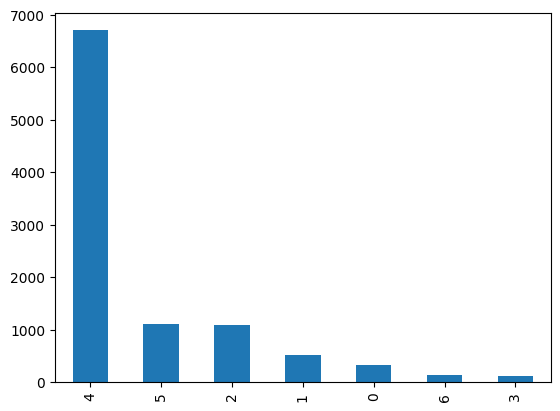

In [ ]:
metadata['lesion_idx'].value_counts().plot.bar()

In [ ]:
import cv2

# Function to read and resize images
def read_and_resize_image(image_path, size):
    img = cv2.imread(image_path)
    img = cv2.resize(img, size)
    return img

image_size = (28, 28)         # ??

# Apply the function to each image path in the 'path' column of the dataframe
metadata['image'] = metadata['path'].apply(lambda x: read_and_resize_image(x, image_size))

# df['image'] = df['path'].apply(read_image)

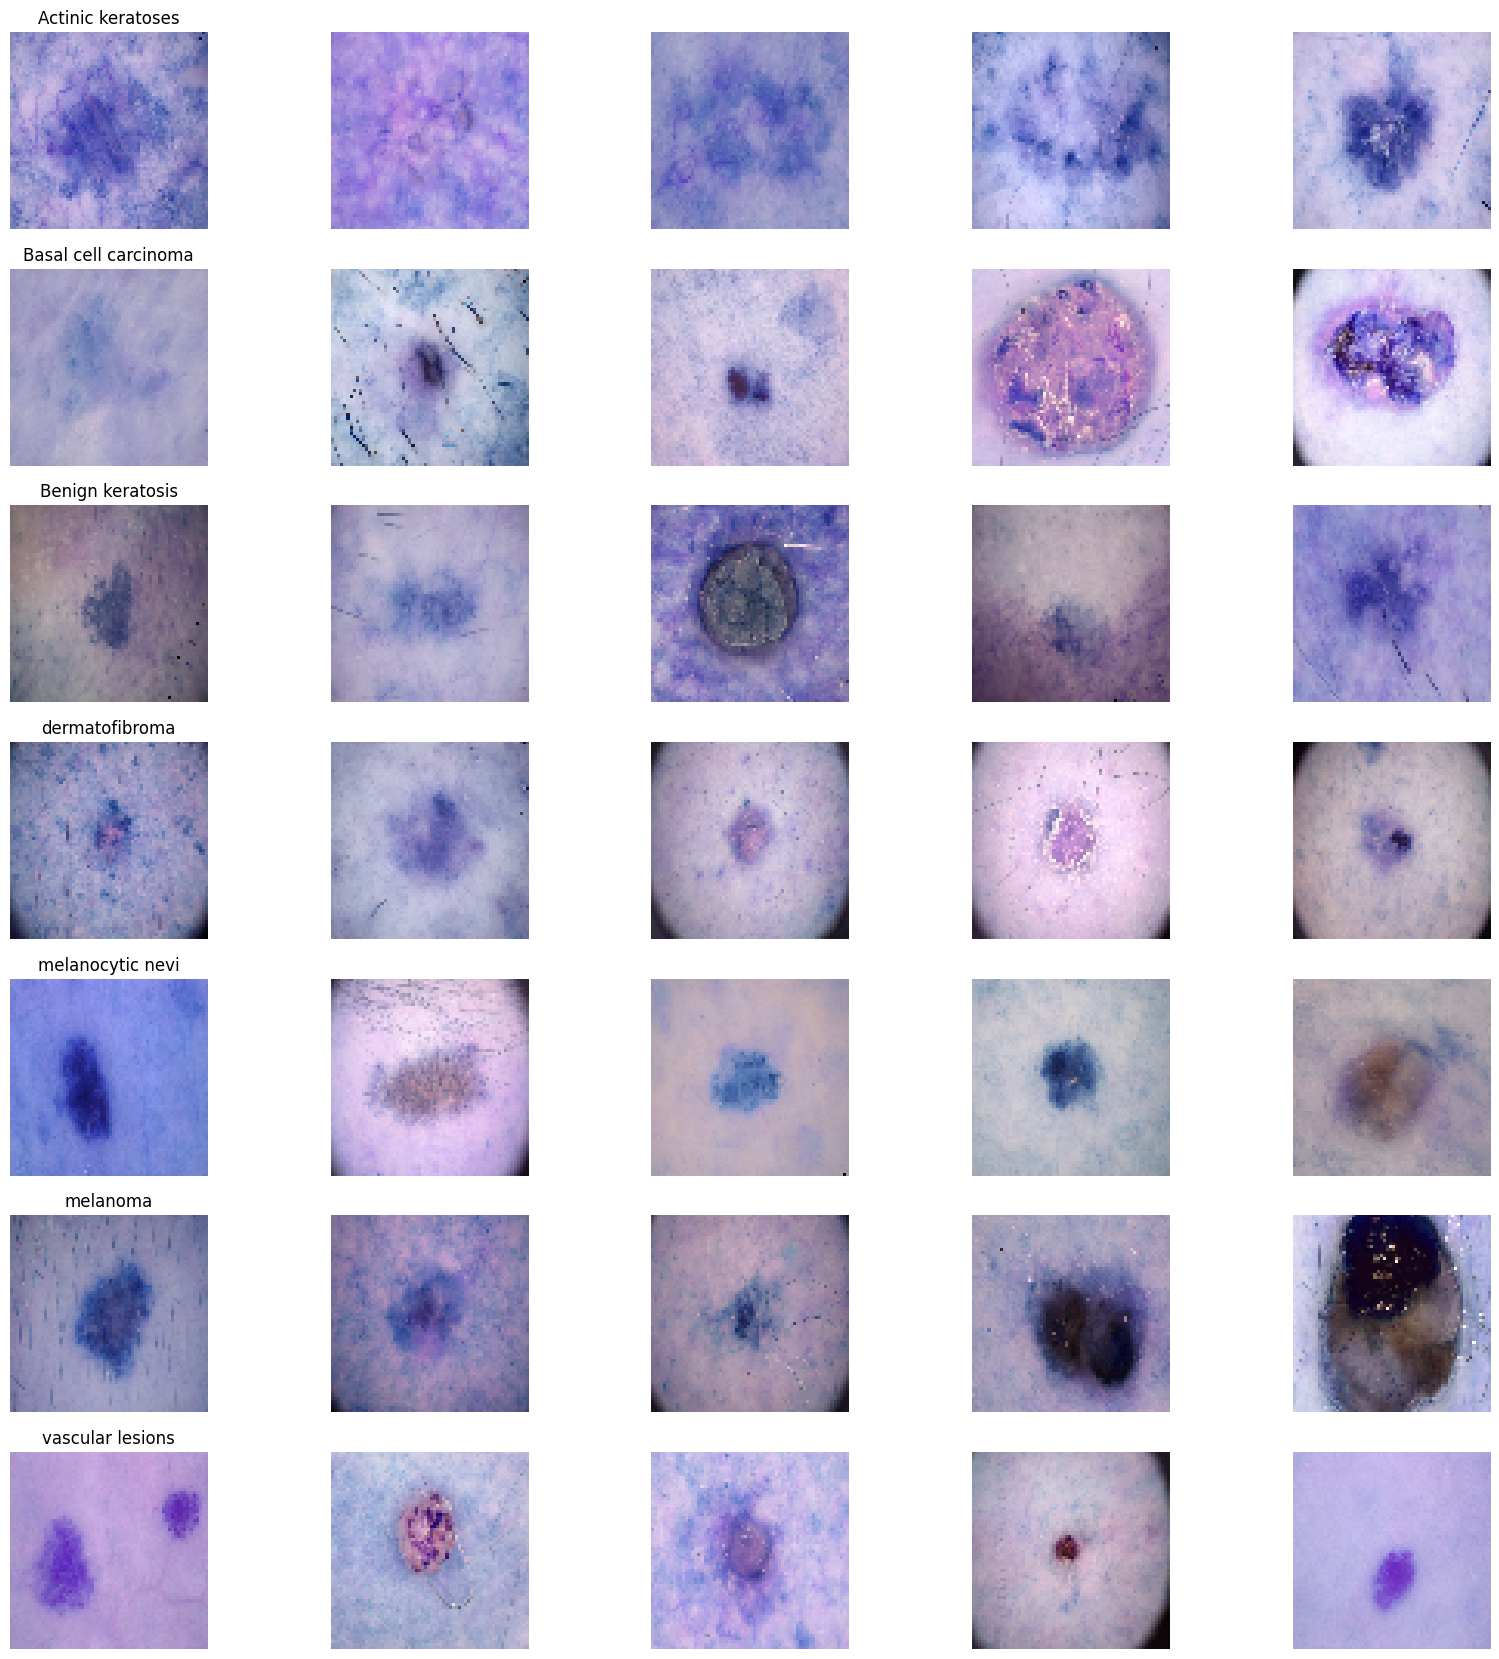

In [ ]:
import matplotlib.pyplot as plt

n_samples = 5
fig, m_axs = plt.subplots(7, n_samples, figsize=(4 * n_samples, 3 * 7))
for n_axs, (type_name, type_rows) in zip(m_axs, metadata.sort_values(['lesion']).groupby('lesion')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')
plt.savefig('category_samples.png', dpi=300)

In [ ]:
metadata['image'].map(lambda x: x.shape).value_counts()

(28, 28, 3)    10015
Name: image, dtype: int64

In [ ]:
X = metadata['image']
y = metadata['lesion_idx']

In [ ]:
import numpy as np
from imblearn.over_sampling import SMOTE
# Convert X and y to NumPy arrays if they are not already
X = np.stack(X.values)
y = y.values

# Verify the shape and type of X and y
print("X shape:", X.shape)
print("y shape:", y.shape)
print("X data type:", X.dtype)
print("y data type:", y.dtype)

# Check the unique values in y to verify if it is categorical
print("Unique values in y:", np.unique(y))

# Reshape X to a 2D array
X_2d = X.reshape(X.shape[0], -1)

# Apply SMOTE oversampling
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_2d, y)

# Reshape the resampled X back to the original shape
X_resampled = X_resampled.reshape(len(X_resampled), X.shape[1], X.shape[2], X.shape[3])

# Verify the shape of the resampled data
print("X_resampled shape:", X_resampled.shape)
print("y_resampled shape:", y_resampled.shape)


X shape: (10015, 28, 28, 3)
y shape: (10015,)
X data type: uint8
y data type: int8
Unique values in y: [0 1 2 3 4 5 6]
X_resampled shape: (46935, 28, 28, 3)
y_resampled shape: (46935,)


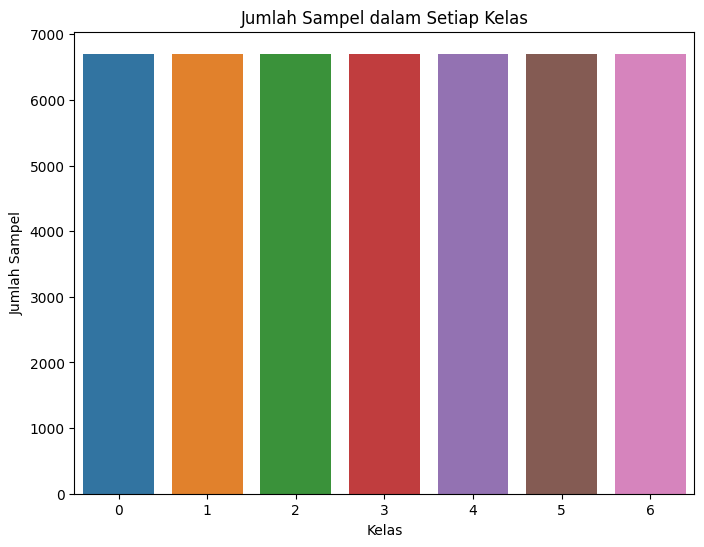

In [ ]:
import seaborn as sns

# Menghitung jumlah kelas dalam array target yang diresampling
class_counts = pd.Series(y_resampled).value_counts()

# Plot bar chart untuk menampilkan jumlah sampel dalam setiap kelas
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Jumlah Sampel dalam Setiap Kelas')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Sampel')
plt.show()

In [ ]:
from keras.utils import to_categorical
y = to_categorical(y_resampled)
X = X_resampled

In [ ]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(37548, 28, 28, 3) (9387, 28, 28, 3) (37548, 7) (9387, 7)


In [ ]:
from sklearn.utils.class_weight import compute_class_weight

def est_class_weights(dis_id: np.array) -> dict:
    class_indices = np.unique(dis_id)
    class_mapping = {class_label: i for i, class_label in enumerate(class_indices)}
    mapped_dis_id = np.array([class_mapping[class_label] for class_label in dis_id])

    class_weights = np.around(compute_class_weight(class_weight='balanced', classes=np.unique(mapped_dis_id), y=mapped_dis_id), 2)
    class_weights = dict(zip(np.unique(mapped_dis_id), class_weights))
    return class_weights

y_id = np.array(metadata['lesion_id'])
new_class_weights = est_class_weights(y_id)
# print(new_class_weights)


In [ ]:
def af (x):
  return x*tf.math.exp(x)*tf.math.tanh(tf.keras.activations.softplus(-x))

In [ ]:
# Custom activation function
from keras.layers import Activation
from keras import backend as K
from tensorflow.keras.utils import get_custom_objects
get_custom_objects().update({'af': Activation(af)})


In [ ]:
model = Sequential()

# conv layer 1
model.add(Conv2D(filters = 32,
                 kernel_size = (3,3),
                 strides = (1,1),
                 activation = 'relu',
                 input_shape = (28, 28, 3)))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (3,3), strides = (1,1)))    # pooling layer 1

# conv layer 2
model.add(Conv2D(filters = 32,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation = 'relu'))
                 #padding = "same"))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (3,3), strides = (1,1)))    # pooling layer 2

# conv layer 3
model.add(Conv2D(filters = 64,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu'))
                 #padding="same"))
#model.add(BatchNormalization())

# conv layer 4
model.add(Conv2D(filters = 64,
                 kernel_size = (3,3),
                 strides = (1,1),
                 activation = 'relu'))
                 #padding = "same"))
#model.add(BatchNormalization())

# # conv layer 5
# model.add(Conv2D(filters = 256,
#                  kernel_size = (1,1),
#                  strides = (1, 1),
#                  activation = 'af',
#                  padding = "same"))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (3,3), strides = (2,2)))    # pooling layer 3

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.4))
# model.add(Dense(4096, activation = 'af'))
# model.add(Dropout(0.4))
model.add(Dense(7, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 22, 22, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 20, 20, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 18, 18, 64)        18496     
                                                                 
 conv2d_20 (Conv2D)          (None, 16, 16, 64)       

In [ ]:
def mod_checkpoint_callback():

    trained_model = ModelCheckpoint(filepath = 'model.h5',
                             save_weights_only = False,
                             monitor = 'val_accuracy',
                             mode = 'auto',
                             save_best_only = True,
                             verbose = 1)
    return trained_model

In [ ]:
early_stopping_monitor = EarlyStopping(patience = 2, monitor = 'val_accuracy')

model_checkpoint_callback = mod_checkpoint_callback()

optimizer = Adam(learning_rate = 0.0001, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-3)
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# datagen = ImageDataGenerator(zoom_range = 0.3, horizontal_flip = True, shear_range = 0.3)
# datagen.fit(X_train)

batch_size = 60
epochs = 30
history = model.fit(X_train,y_train,
                    epochs = epochs,
                    batch_size = batch_size,
                    shuffle = True,
                    callbacks = [early_stopping_monitor, model_checkpoint_callback],
                    validation_data = (X_test, y_test),
                    class_weight = new_class_weights
                )

Epoch 1/30
626/626 [==============================] - ETA: 0s - loss: 1.9513 - accuracy: 0.2694
Epoch 1: val_accuracy improved from -inf to 0.31245, saving model to model.h5
626/626 [==============================] - 164s 260ms/step - loss: 1.9513 - accuracy: 0.2694 - val_loss: 1.7357 - val_accuracy: 0.3125
Epoch 2/30
626/626 [==============================] - ETA: 0s - loss: 1.1577 - accuracy: 0.3405
Epoch 2: val_accuracy improved from 0.31245 to 0.40013, saving model to model.h5
626/626 [==============================] - 166s 266ms/step - loss: 1.1577 - accuracy: 0.3405 - val_loss: 1.5655 - val_accuracy: 0.4001
Epoch 3/30
626/626 [==============================] - ETA: 0s - loss: 1.0511 - accuracy: 0.4005
Epoch 3: val_accuracy improved from 0.40013 to 0.42942, saving model to model.h5
626/626 [==============================] - 163s 260ms/step - loss: 1.0511 - accuracy: 0.4005 - val_loss: 1.4622 - val_accuracy: 0.4294
Epoch 4/30
626/626 [==============================] - ETA: 0s - los

In [ ]:
scores = model.evaluate(X_test, y_test, verbose = 1)
print("Accuracy: %.2f%%" % (scores[1] * 100))

294/294 [==============================] - 9s 32ms/step - loss: 0.8246 - accuracy: 0.7647
Accuracy: 76.47%


In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

classification_rep = classification_report(y_test_classes, y_pred_classes)
print("Classification Report:")
print(classification_rep)

294/294 [==============================] - 9s 29ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.80      0.75      1295
           1       0.64      0.79      0.71      1323
           2       0.62      0.56      0.59      1351
           3       0.89      0.88      0.88      1392
           4       0.87      0.89      0.88      1346
           5       0.71      0.53      0.61      1312
           6       0.91      0.89      0.90      1368

    accuracy                           0.76      9387
   macro avg       0.76      0.76      0.76      9387
weighted avg       0.77      0.76      0.76      9387



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
cm

array([[1035,  109,   80,   25,    1,   35,   10],
       [ 108, 1044,   79,   26,    4,   38,   24],
       [ 142,  200,  761,   39,   54,  132,   23],
       [  46,   53,   36, 1219,    0,   21,   17],
       [  12,   30,   55,    6, 1201,   37,    5],
       [ 112,  117,  185,   35,  119,  696,   48],
       [  16,   68,   27,   19,    0,   16, 1222]])

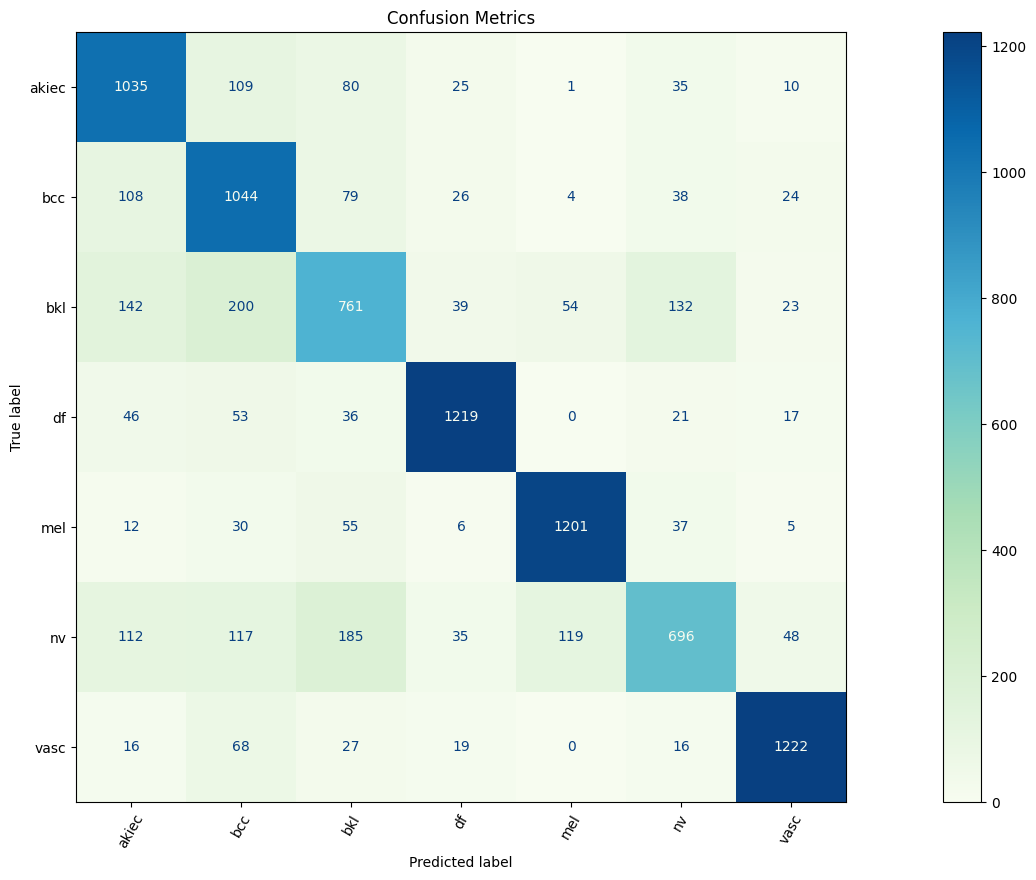

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

display_c_m = ConfusionMatrixDisplay(cm, display_labels=class_cancer )
fig, ax = plt.subplots(figsize=(25,10))
display_c_m.plot(cmap='GnBu',ax=ax,xticks_rotation=60)
plt.title("Confusion Metrics")
plt.show()